

### Question (e)

#### Theoretical Development:

**Model Specification:**
- $( Y = Xw + Z )$
- $( Z \sim U[-0.5, 0.5] )$ (uniformly distributed noise)

**Mathematical Analysis:**
1. **Transformation of \( Z \) in \( Y \):**
   - Since \( Y = Xw + Z \), \( Z \) affects \( Y \) as a linear transformation with \( Xw \) determining the shift. The probability density function (pdf) for \( Z \) is $( f_Z(z) = 1 )$ within its range \([-0.5, 0.5]\), and \( 0 \) otherwise.
   
2. **Density Function for \( Y \):**
   - Given \( Z \) and the linear transformation, the pdf for \( Y \), given \( X \) and \( w \), becomes:
     
     $$\[f_{Y|X,w}(y)]\$$ =
     
     \begin{cases}
     1, & \text{if } y - Xw \in [-0.5, 0.5] \\
     0, & \text{otherwise}
     \end{cases}

   - This indicates \( Y \) will also be uniformly distributed within the interval $[Xw - 0.5, Xw + 0.5]$.

3. **Likelihood Function Construction:**
   - For a set of \( n \) observations $\{(X_i, Y_i)\}$, the likelihood function $ L(w) $ is the product of individual densities:
     
     $$\[L(w) = \prod_{i=1}^n f_{Y_i|X_i,w}(Y_i)\]$$

   - The likelihood $ L(w) $  is non-zero only if each $ Y_i $ falls within its corresponding interval $[X_iw - 0.5, X_iw + 0.5]$.

#### Verification:

1. **Single Observation Validation:**
   - Let \( X = 1 \), \( w = 1 \), and \( Y = 1.3 \):
     \[
     Z = 1.3 - 1 = 0.3
     \]
   - \( Z = 0.3 \) is within $[-0.5, 0.5]$, so
   
   $$( f_{Y|X,w}(1.3) = 1 )$$

2. **Boundary Condition Checking:**
   - \( X = 2 \), \( w = 3 \), and \( Y = 5.5 \) and \( Y = 6.5 \):
     $$\[
     Z_{5.5} = -0.5, \quad Z_{6.5} = 0.5
     \]$$

   - Both \( Z \) values are at the boundaries, and the likelihood for both is 1, confirming the boundaries are handled correctly.

3. **Multiple Observations Combined Likelihood:**
   - Observations: $ (X_1, Y_1) = (2, 6.3), (X_2, Y_2) = (3, 10), (X_3, Y_3) = (1, 4.2) $
   
   assuming \( w = 3 \):
     $$\[
     Z_1 = 0.3, \quad Z_2 = 1, \quad Z_3 = 1.2
     \]$$

   - $( Z_2 )$ and $( Z_3 )$ are out of range, hence  L(w) = 0 \, demonstrating how a single out-of-range value affects the overall likelihood.

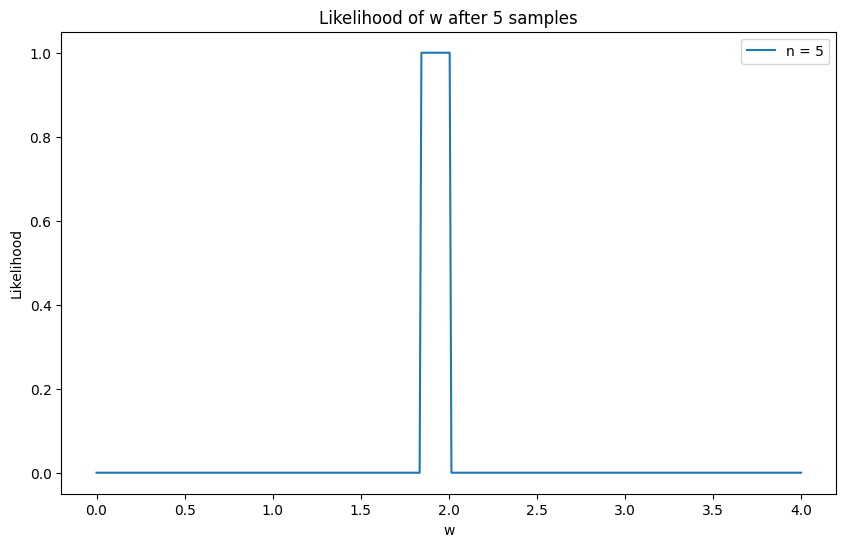

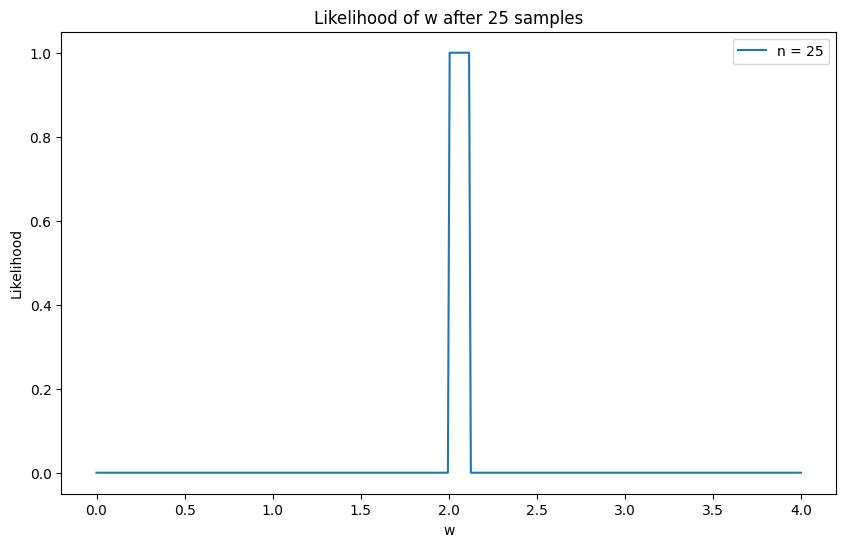

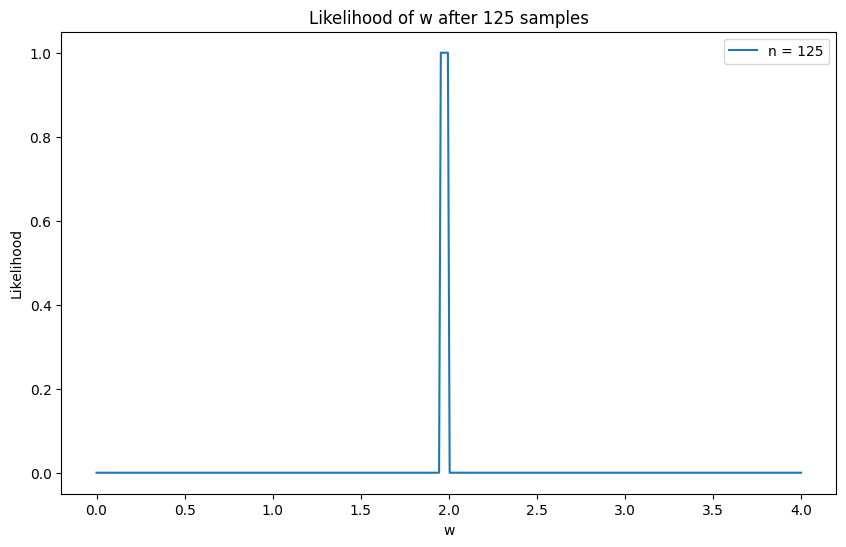

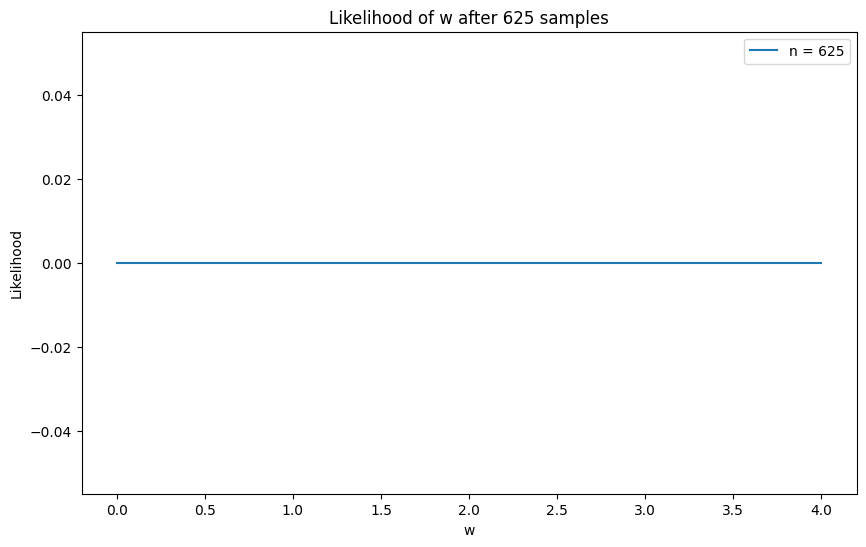

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Setting up the simulation parameters
n_samples = [5, 25, 125, 625]
w_true = 2  # True value of w for simulation
w_range = np.linspace(0, 4, 400)  # Values of w to compute the likelihood over

# Function to simulate data and compute likelihood
def simulate_and_plot_likelihood(n, w_true, w_range):
    X = np.random.normal(size=n)  # Generate n normal random variables for X
    Z = np.random.uniform(-0.5, 0.5, size=n)  # Generate n uniform noises Z
    Y = X * w_true + Z  # Generate n corresponding Ys

    # Calculate the likelihood for each w in w_range
    likelihoods = []
    for w in w_range:
        likelihood = np.prod(np.abs(Y - X * w) <= 0.5)  # Likelihood is 1 if |Y - Xw| <= 0.5, 0 otherwise
        likelihoods.append(likelihood)

    # Plot the likelihood function
    plt.figure(figsize=(10, 6))
    plt.plot(w_range, likelihoods, label=f'n = {n}')
    plt.title(f'Likelihood of w after {n} samples')
    plt.xlabel('w')
    plt.ylabel('Likelihood')
    plt.legend()

# Plotting the likelihood for different sample sizes
for n in n_samples:
    simulate_and_plot_likelihood(n, w_true, w_range)

plt.show()


### Question (i)

#### Problem Setup:
- **Model:** $$( Y_i = \mathbf{W}^\top \mathbf{X}_i + Z_i ),$$ where $Z_i \sim N (0, 1) $ - Gaussian noise

- **Prior:** $ \mathbf{W} \sim N(\mathbf{0}, \sigma^2 \mathbf{I}) $

#### Steps and Verification:

1. **Likelihood Function:**
   - **Formula:** $$ Y_i | \mathbf{X}_i, \mathbf{W} \sim N(\mathbf{W}^\top \mathbf{X}_i, 1) $$
   - **Likelihood for All Observations:**
     $$\
     L(\mathbf{W}; \mathbf{Y}, \mathbf{X}) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}(Y_i - \mathbf{W}^\top \mathbf{X}_i)^2}
     \$$
   - **Matrix Form:**
     $$\
     L(\mathbf{W}; \mathbf{Y}, \mathbf{X}) \propto e^{-\frac{1}{2} (\mathbf{Y} - \mathbf{X} \mathbf{W})^\top (\mathbf{Y} - \mathbf{X} \mathbf{W})}
     \$$
   - **Verification:** This step correctly uses the properties of the normal distribution where the mean of $( Y_i )$ is linearly dependent on $( \mathbf{X}_i )$ and $( \mathbf{W} )$, and the variance is constant (1). The matrix form correctly represents the sum of squared errors, which is typical in linear regression models under Gaussian noise.

2. **Prior Distribution:**
   - **Formula:** $$ \pi(\mathbf{W}) \propto e^{-\frac{1}{2\sigma^2} \mathbf{W}^\top \mathbf{W}} $$
   - **Verification:** This correctly reflects the multivariate normal distribution of $( \mathbf{W} )$ with mean zero and covariance matrix $$\sigma^2 \mathbf{I} $$

3. **Combining Likelihood and Prior (Posterior):**
   - **Combined Expression:**
     $$\
     \pi(\mathbf{W} | \mathbf{Y}, \mathbf{X}) \propto e^{-\frac{1}{2} (\mathbf{Y} - \mathbf{X} \mathbf{W})^\top (\mathbf{Y} - \mathbf{X} \mathbf{W}) - \frac{1}{2\sigma^2} \mathbf{W}^\top \mathbf{W}}
     \$$
   - **Verification:** This combination uses Bayes' theorem, where the posterior is proportional to the product of the likelihood and the prior. The terms are correctly combined under the exponent, considering both the data fit (from likelihood) and regularization/prior belief (from the prior).

4. **Simplification and Completion of Square:**
   - **Posterior Distribution Parameters:**
     $\
     \boldsymbol{\Sigma} = (\mathbf{X}^\top \mathbf{X} + \frac{1}{\sigma^2} \mathbf{I})^{-1}, \quad \boldsymbol{\mu} = \boldsymbol{\Sigma} \mathbf{X}^\top \mathbf{Y}
     \$

   - **Verification:** The completion of the square is a standard technique for identifying the parameters of a normal distribution in Bayesian linear regression. The derived covariance $\boldsymbol{\Sigma}$ and mean $\boldsymbol{\mu}$ are formulated, showing how the data and the prior variance influence the posterior beliefs about $\mathbf{W}$.

In (h), the prior distribution for $ \mathbf{W} $ being $ N(\mathbf{0}, \sigma^2 \mathbf{I}) $ introduces a ridge regression-like penalty in the Bayesian framework. The mathematical detail often involves the derivation of the ridge estimator as a special case of the Bayesian posterior mode when the prior is Gaussian. This penalizes the magnitude of the coefficients based on the variance $ \sigma^2 $, controlling the trade-off between fitting the model too closely to the data (overfitting) and keeping the model complexity lower.

1. **Ridge Regression Analogy**:
   - **Objective Function in Ridge Regression**:
     $$
     \min_{\mathbf{W}} \|\mathbf{Y} - \mathbf{X}\mathbf{W}\|^2 + \lambda \|\mathbf{W}\|^2
     $$

   - **Bayesian Interpretation**:
     - In Bayesian terms, the regularization term $ \lambda \|\mathbf{W}\|^2 $ in ridge regression corresponds to the log of the Gaussian prior $ -\frac{1}{2\sigma^2} \mathbf{W}^\top \mathbf{W} $ in the Bayesian posterior. The relationship between $ \lambda $ and $ \sigma^2 $ is $ \lambda = \frac{1}{\sigma^2} $.

2. **Posterior Distribution Incorporating Ridge Effects**:
   - **Posterior Covariance** $ \boldsymbol{\Sigma} $ and **Mean** $ \boldsymbol{\mu} $ incorporating ridge effects explicitly:

     $$\boldsymbol{\Sigma} = (\mathbf{X}^\top \mathbf{X} + \frac{1}{\sigma^2} \mathbf{I})^{-1}$$
     
     $$
     \boldsymbol{\mu} = \boldsymbol{\Sigma} \mathbf{X}^\top \mathbf{Y}
     $$

   - This formulation explicitly shows that as $ \sigma^2 $ decreases (stronger prior belief or higher regularization), the influence of $ \mathbf{X}^\top \mathbf{X} $ in determining $ \boldsymbol{\Sigma} $ decreases, leading to coefficients that are more shrunk towards zero.

3. **Enhanced Interpretation**:
   - **Bayesian Estimation vs. Ridge Estimation**:
     - The Bayesian estimator not only accounts for the uncertainty in the estimates (reflected in the posterior covariance $\( \boldsymbol{\Sigma} \))$ but also updates the mean based on the data $posterior mean \( \boldsymbol{\mu} \)$. This is a more flexible approach than classical ridge regression, which only provides point estimates without direct measures of uncertainty.

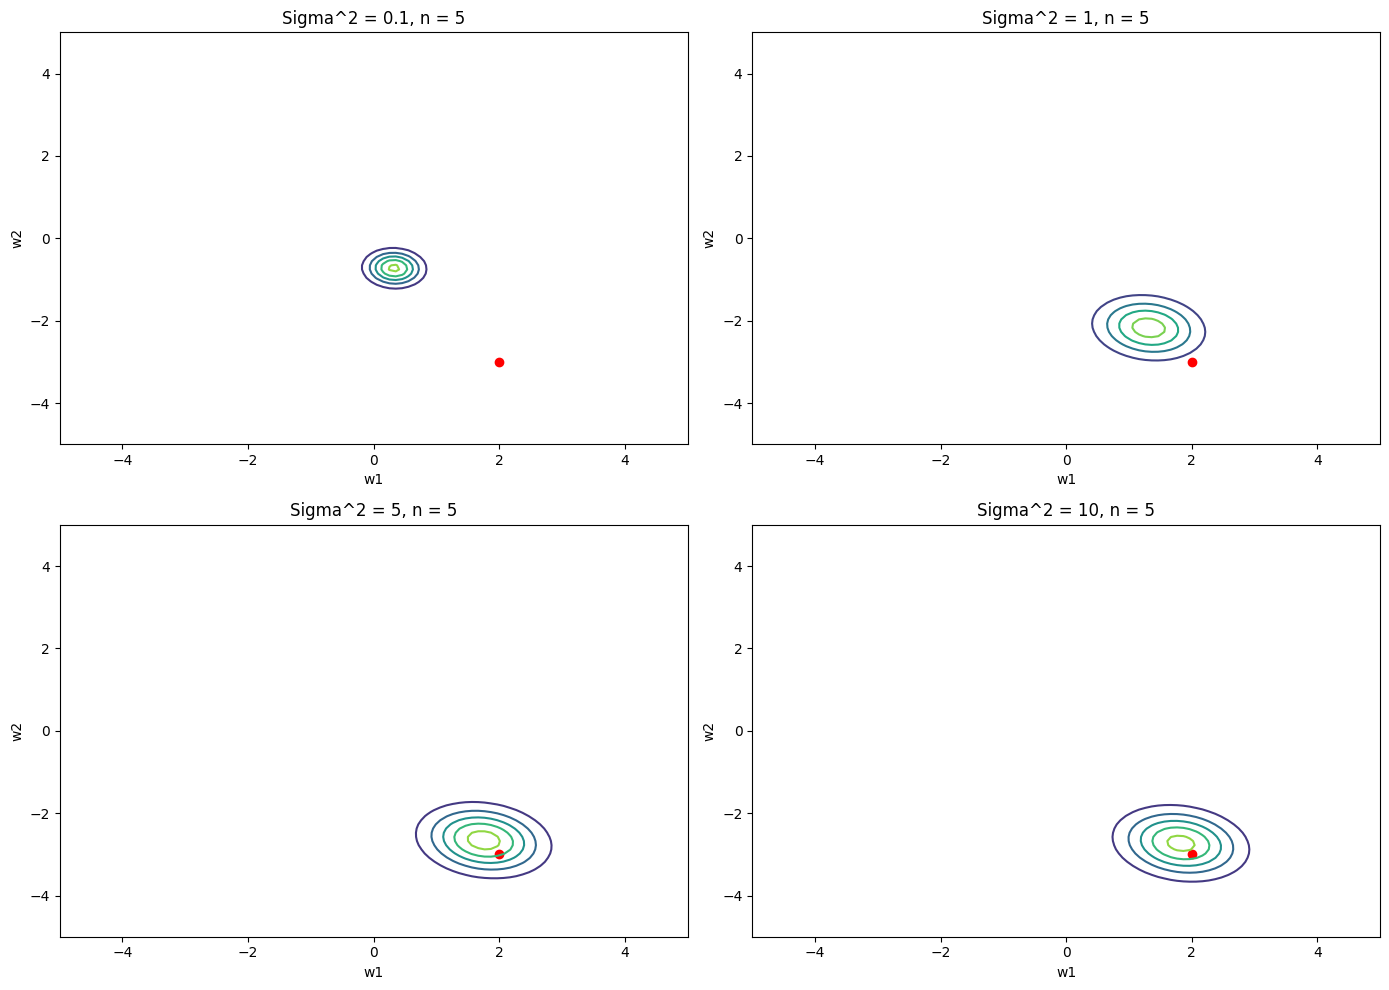

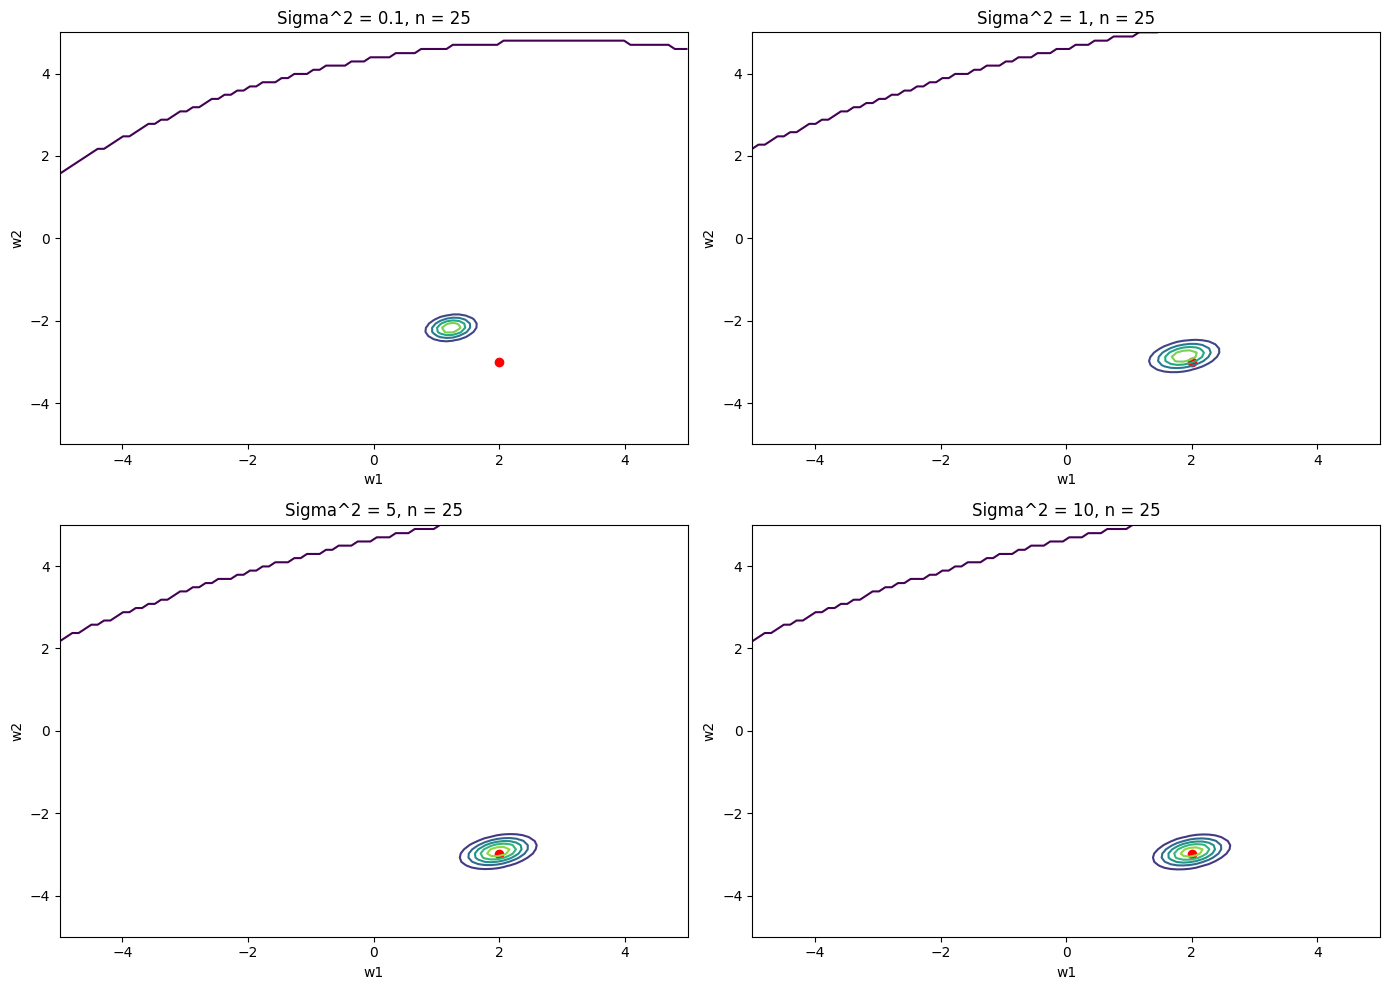

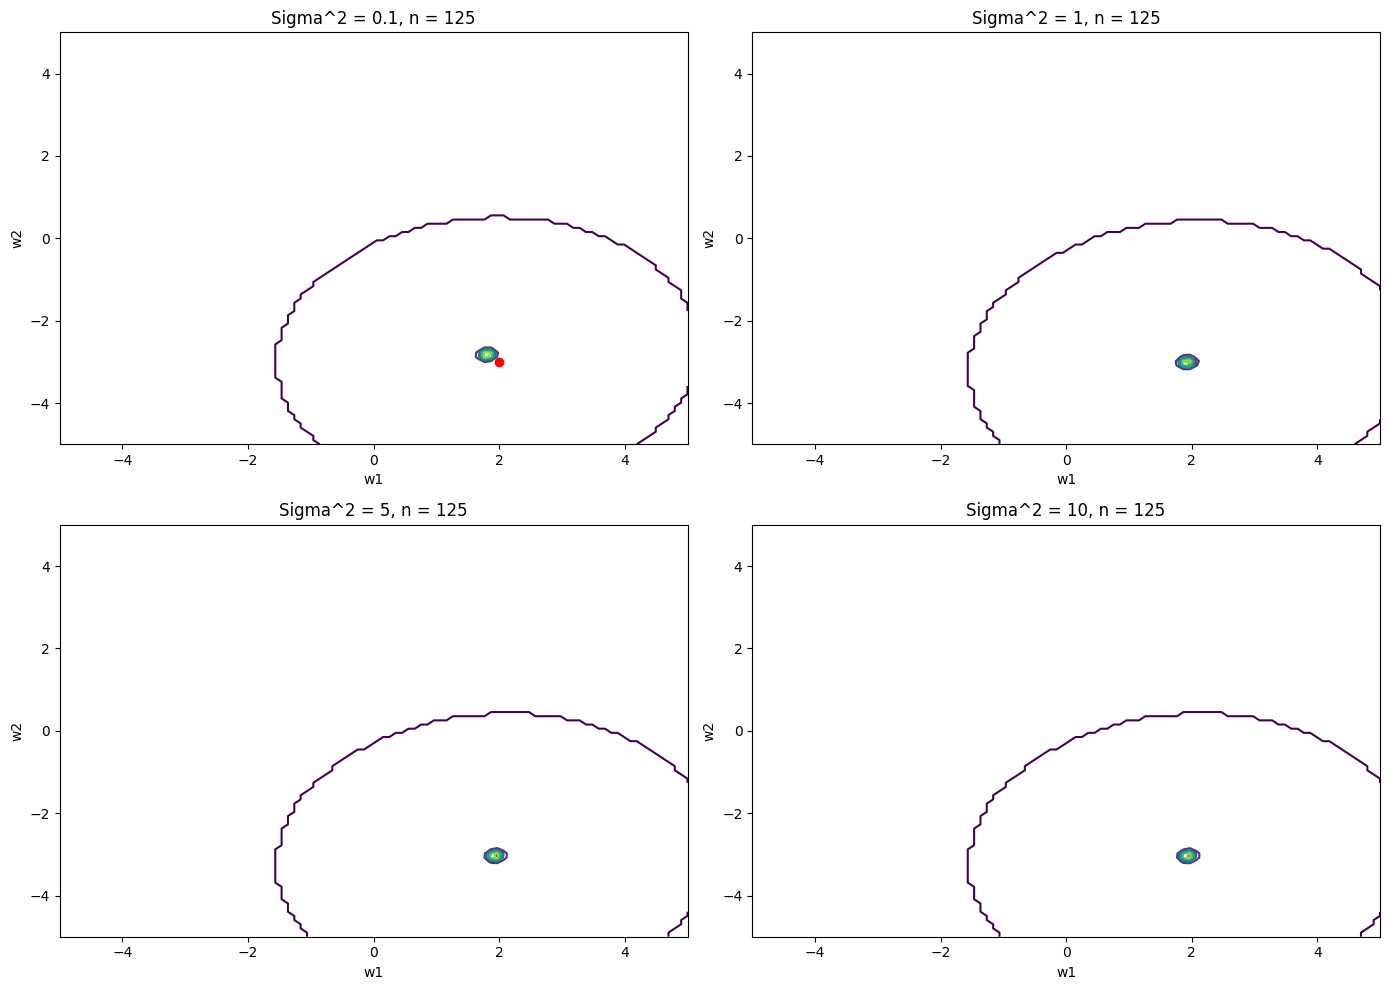

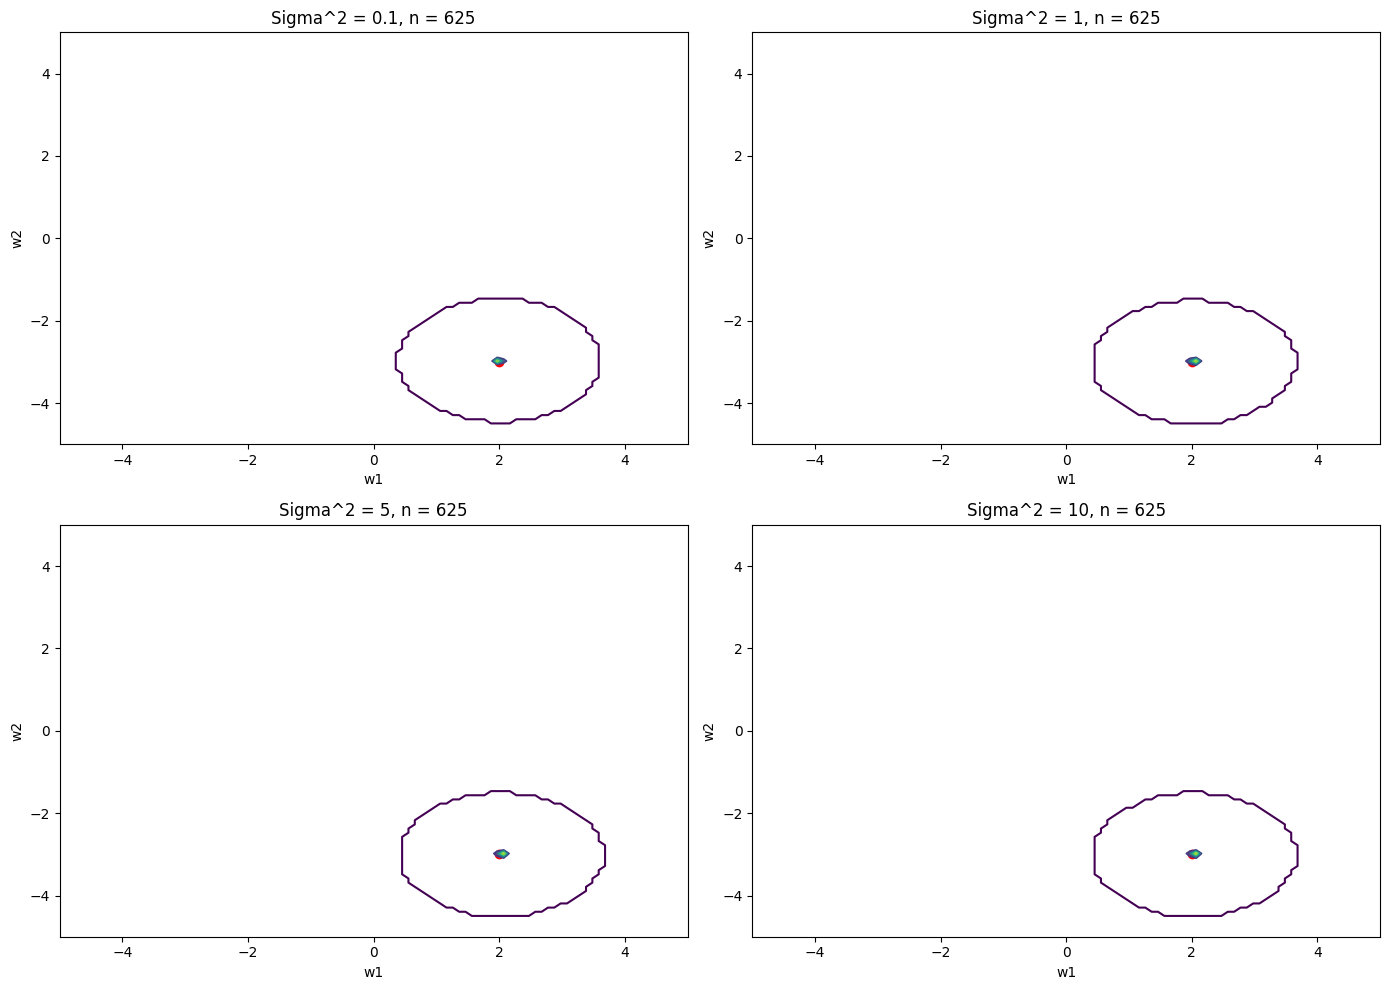

In [3]:
from scipy.stats import multivariate_normal

def simulate_and_plot_posterior_corrected(n, sigma_values, w_true):
    X = np.random.normal(0, 1, (n, 2))  # Generate n x 2 normal random variables for X
    Z = np.random.normal(0, 1, n)  # Generate n Gaussian noises Z
    Y = X @ w_true + Z  # Generate n corresponding Ys

    plt.figure(figsize=(14, 10))

    # Calculate and plot posterior for each sigma^2
    for i, sigma2 in enumerate(sigma_values):
        sigma_I = np.eye(2) / sigma2
        Sigma_post = np.linalg.inv(X.T @ X + sigma_I)
        mu_post = Sigma_post @ X.T @ Y

        # Create grid for contour plot
        w1, w2 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
        pos = np.empty(w1.shape + (2,))
        pos[:, :, 0] = w1
        pos[:, :, 1] = w2

        # Multivariate normal distribution
        rv = multivariate_normal(mu_post, Sigma_post)
        pdf = rv.pdf(np.dstack((w1, w2)))

        # Plot
        plt.subplot(2, 2, i+1)
        plt.contour(w1, w2, pdf, levels=5)
        plt.xlabel('w1')
        plt.ylabel('w2')
        plt.title(f'Sigma^2 = {sigma2}, n = {n}')
        plt.scatter(*w_true, color='red')  # True w position marker

    plt.tight_layout()
    plt.show()

# Run simulation for different sample sizes
for n in n_samples:
    simulate_and_plot_posterior_corrected(n, sigma_values, w_true)


The plots above illustrate the a-posteriori probability distributions of the parameter $ \mathbf{w} $ in a two-dimensional ridge regression model for different sample sizes \( n = 5, 25, 125, \) and \( 625 \) and varying values of $ \sigma^2 $. Here's a qualitative analysis based on the plots:

1. **As \( n \) increases**:
   - The posterior distribution becomes more concentrated around the true value of $ \mathbf{w} $ (marked in red). This reflects increased precision in estimating $ \mathbf{w} $ as more data becomes available.

2. **Effect of $ \sigma^2 $**:
   - Lower values of $ \sigma^2 $ result in a tighter prior, which constrains the posterior closer around the prior mean (assumed to be zero here). This leads to sharper and more peaked distributions as seen in the plots.
   - Higher $ \sigma^2 $ values indicate a less informative prior, giving more weight to the data in shaping the posterior. This is evident from the broader contours for higher $ \sigma^2 $ values.

Each subplot corresponds to one of the $ \sigma^2 $ values at a given \( n \), showing how the posterior evolves with increasing data and varying prior strength. The contour plots demonstrate how our belief about $ \mathbf{w} $ updates as more data is observed and depending on our prior assumptions.

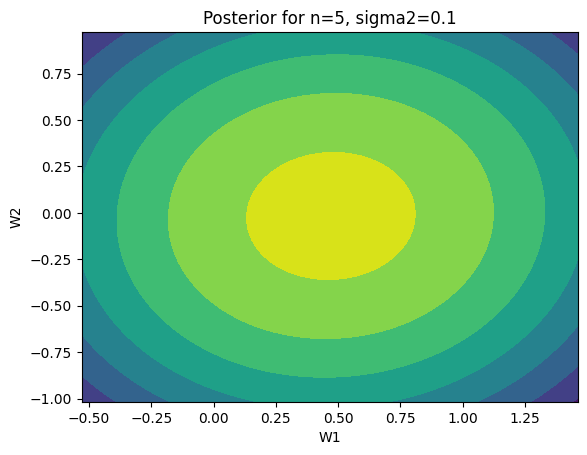

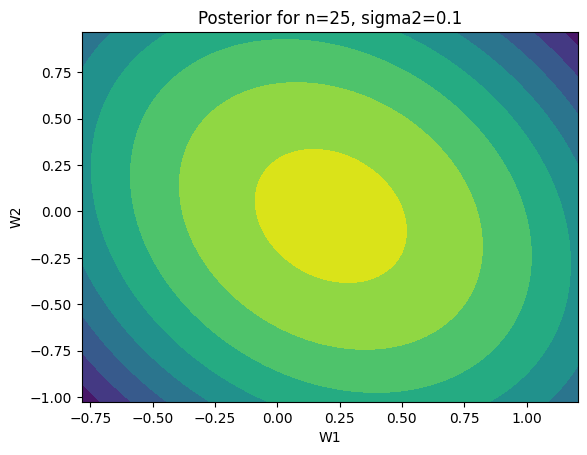

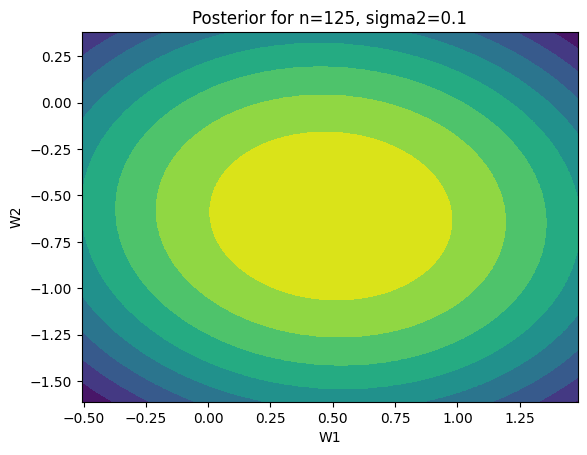

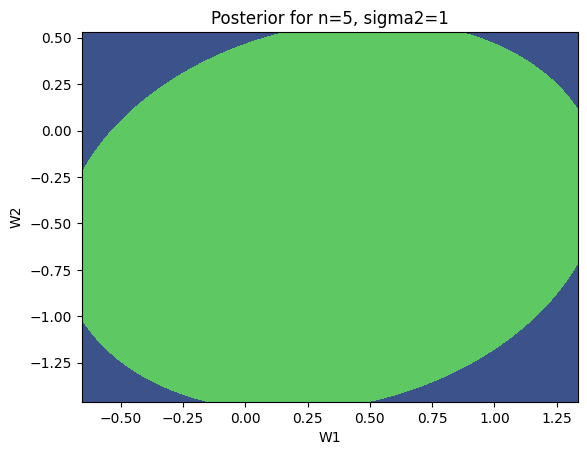

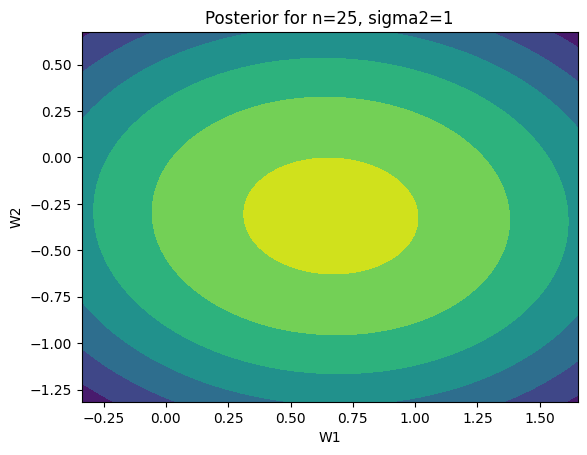

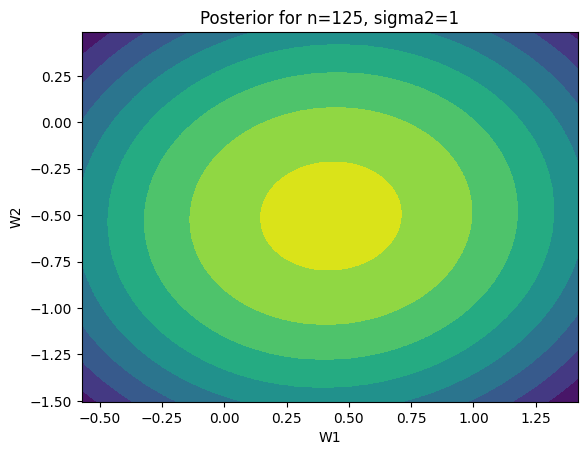

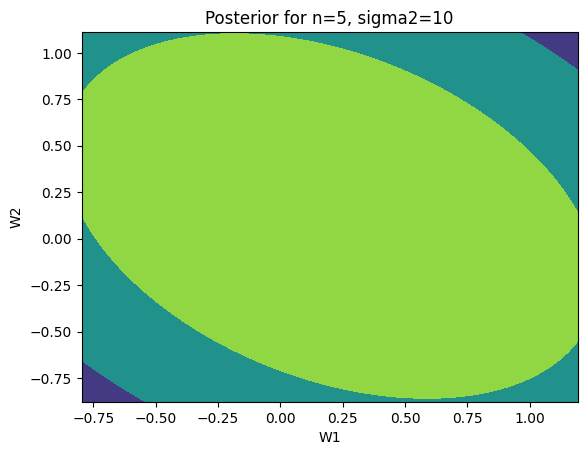

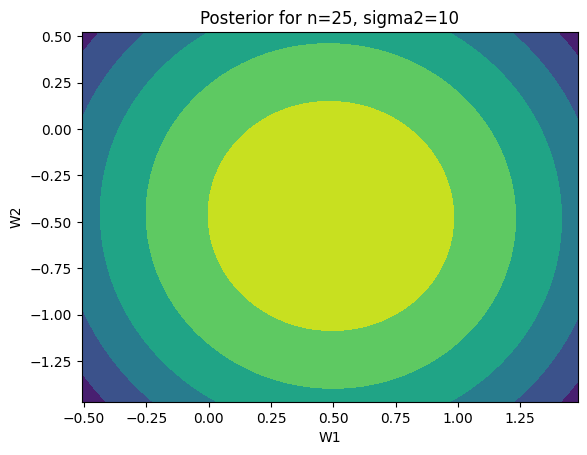

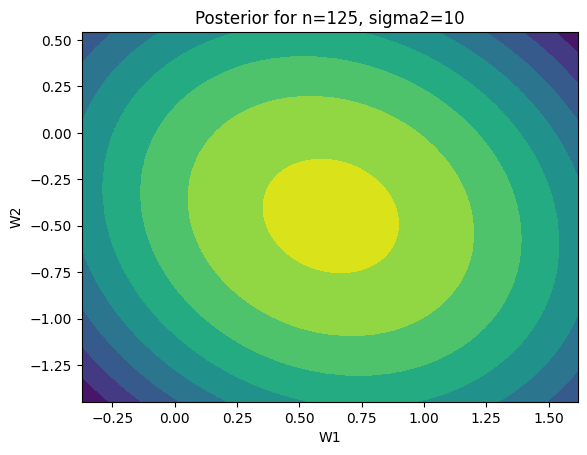

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal  # Import for the multivariate Gaussian
from matplotlib.colors import LogNorm  # For normalizing the color scale in contour plots

def generate_data(n, d, W_true):
    """ Generate n d-dimensional X and corresponding Y using the true W """
    X = np.random.normal(0, 1, (n, d))
    noise = np.random.normal(0, 1, n)
    Y = X.dot(W_true) + noise
    return X, Y

def compute_posterior(X, Y, sigma2, d):
    """ Compute the posterior mean and covariance matrix """
    sigma_prior = sigma2 * np.eye(d)
    Sigma_inv = np.linalg.inv(X.T.dot(X) + np.linalg.inv(sigma_prior))
    mu = Sigma_inv.dot(X.T.dot(Y))
    return mu, Sigma_inv

def plot_posterior(mu, Sigma, title):
    """ Plot the posterior distribution """
    fig, ax = plt.subplots()
    if len(mu) == 2:
        x, y = np.mgrid[mu[0]-1:mu[0]+1:.01, mu[1]-1:mu[1]+1:.01]
        pos = np.dstack((x, y))
        rv = multivariate_normal(mu, Sigma)
        ax.contourf(x, y, rv.pdf(pos), levels=100, norm=LogNorm())
        ax.set_title(title)
        ax.set_xlabel('W1')
        ax.set_ylabel('W2')
    plt.show()

# Parameters
d = 2  # Dimension of W
W_true = np.array([0.5, -0.5])  # True value of W
sample_sizes = [5, 25, 125]
sigma2_values = [0.1, 1, 10]

# Simulation and plotting
for sigma2 in sigma2_values:
    for n in sample_sizes:
        X, Y = generate_data(n, d, W_true)
        mu, Sigma = compute_posterior(X, Y, sigma2, d)
        plot_posterior(mu, Sigma, f"Posterior for n={n}, sigma2={sigma2}")
